# General - Wordcloud

This Jupyter Notebook provides the source used to create the wordcloud from the keywords obtained from papers.  
It performs the following steps:
1. Loads the keywords
2. Counts keyword frequencies
3. Generates the wordclouds (original and processed)

## 1. Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from PIL import Image
from random import Random
from wordcloud import WordCloud

from utils import *

## 2. Loading the dataset

Google Forms was used to collect the responses for the Data Extraction Form.  
The responses were exported first to Google Sheets and then from Google Sheets to a CSV file.  
Finally, the CSV file is loaded using the pandas.

In [2]:
keywords = DataExtraction().get_keywords()

## 3. Counting keywords frequency

After loading the dataset, there is the need to cleanup and count the keywords frequencies.  
There are a few cleanup cases that should be taken note of:
1. Papers without keywords were marked as 'not available' and were removed from the list.
2. Papers containing acronym definition between parentheses inside the keywords were kept, but the acronym definition was removed;
3. Hyphens were replaced by white spaces.

All keywords were normalized to lowercase and trailing white spaces were removed after retrieving the list of keywords from the CSV.

In [3]:
def cleanup(keyword, lowercase=True):
    cleaned_up = re.sub(' +', ' ', keyword)
    cleaned_up = re.sub('\(\w+\)', '', cleaned_up)
    cleaned_up = cleaned_up.replace('-', ' ')
    
    if lowercase:
        cleaned_up = cleaned_up.lower()
    else:
        cleaned_up = cleaned_up.upper()
        
    return cleaned_up.strip()

def count_frequencies(keywords_per_paper, fix=None, split=False, lowercase=True):
    frequencies = {}
    
    for keywords in keywords_per_paper:
        
        if 'Not available' in keywords:
            continue
        
        for keyword in keywords.split(';'):
            keyword = cleanup(keyword, lowercase)
            
            if fix:
                keyword = fix.get(keyword, keyword)
                
            if split:
                for word in keyword.split():
                    try:
                        frequencies[word] = frequencies[word] + 1
                    except KeyError:
                        frequencies[word] = 1
            else:
                try:
                    frequencies[keyword] = frequencies[keyword] + 1
                except KeyError:
                    frequencies[keyword] = 1
                    
    return frequencies

def print_frequencies_table(frequencies, keep=-1):
    
    
    
    table_header = (
'''
\\begin{table}[htb!]
\t\\centering
\t\\small
\t\\caption{}
\t\\begin{tabular}{@{}lr@{}}
\t\t\\toprule
\t\tKeyword                               & Frequency \\\\
\t\t\\midrule\
''')

    table_footer = (
'''
\t\t\\bottomrule
\t\\end{tabular}
\\end{table}\
'''
)
    
    size_after_break = 9
    size_before_break = 37
    
    print(table_header, end='')
    
    i = 0
    for keyword, occurrences in sorted(frequencies.items(), key=lambda f: (-f[1], f[0])):
        print(f'\n\t\t{keyword:<{size_before_break}} & {occurrences:>{size_after_break}} \\\\', end='')
        
        if i == keep:
            break
            
        i += 1
        
    print(table_footer)

In [4]:
original_frequencies = count_frequencies(keywords)
print_frequencies_table(original_frequencies)


\begin{table}[htb!]
	\centering
	\small
	\caption{}
	\begin{tabular}{@{}lr@{}}
		\toprule
		Keyword                               & Frequency \\
		\midrule
		cloud computing                       &        39 \\
		energy efficiency                     &        17 \\
		virtualization                        &        11 \\
		energy consumption                    &         9 \\
		green computing                       &         9 \\
		virtual machine                       &         9 \\
		service level agreement               &         8 \\
		virtual machine placement             &         8 \\
		resource management                   &         7 \\
		virtual machine migration             &         7 \\
		vm consolidation                      &         7 \\
		data center                           &         5 \\
		virtual machine consolidation         &         5 \\
		vm migration                          &         5 \\
		cloudsim                              &         4 \\
		quality of servi

## 4. Creating the wordcloud from the frequency map using a mask

The wordcloud is created using the package of same name.  
Inkscape was used to create the the SVG mask in the format of a cloud. It was then exported to PNG format and loaded using PIL.  
The result is saved as a PNG file. For convenience, the result is also shown in this Jupyter Notebook.

In [5]:
def create_wordcloud(frequencies, filename):
    random_state = Random(20170226)
    
    viridis = cm.get_cmap('viridis', 256)
    colormap = ListedColormap(viridis(np.linspace(0, 1, 256))[:230])

    cloud_mask = np.array(Image.open('../data/data_extraction/Cloud.png'))
    wordcloud = WordCloud(background_color='white', 
                          mask=cloud_mask, 
                          colormap=colormap, 
                          random_state=random_state).generate_from_frequencies(frequencies)
    wordcloud.to_file(f'../output/{filename}')

    plt.figure(figsize = (28, 14))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### 4.1 Printing and saving the original wordcloud

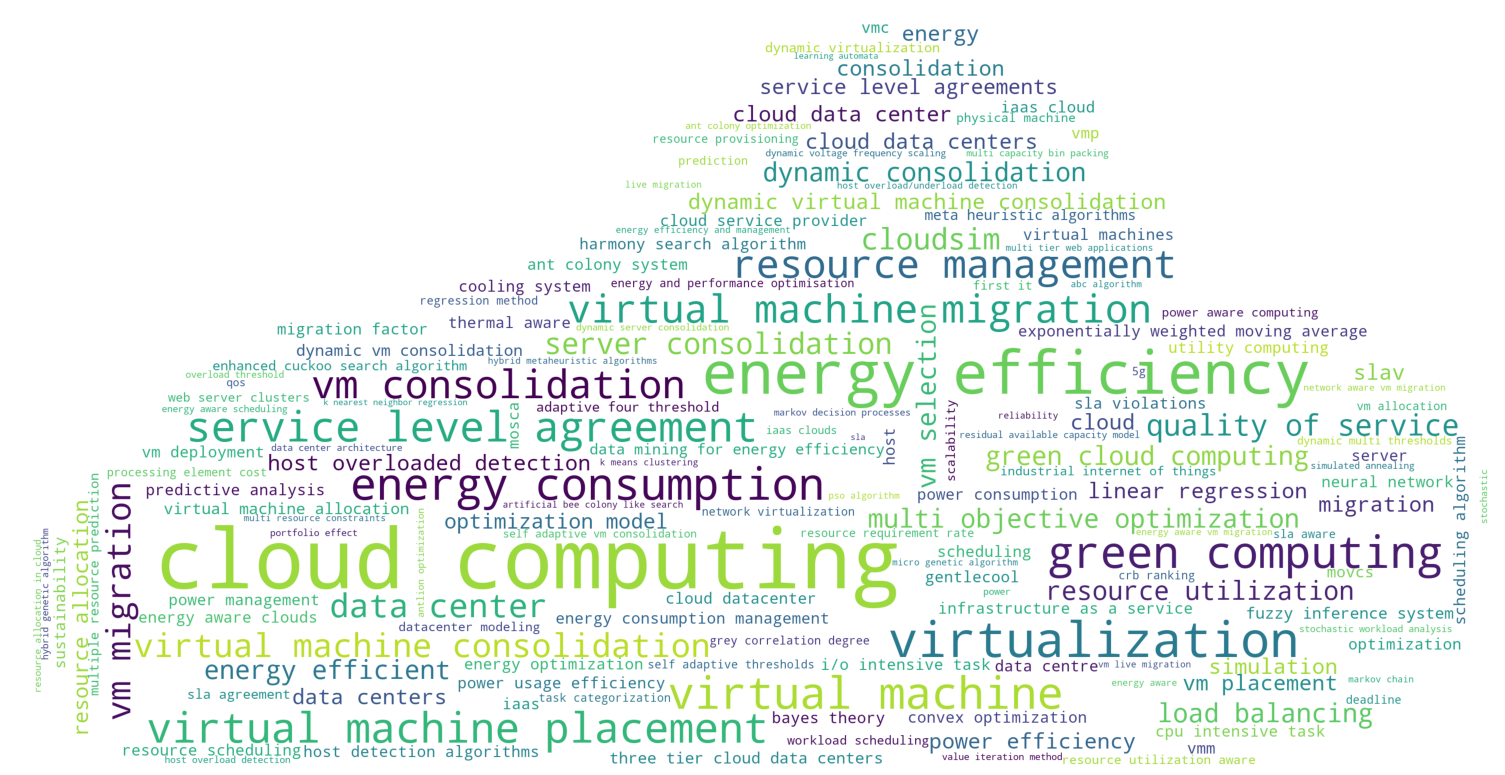

In [6]:
create_wordcloud(original_frequencies, 'DEF-WordcloudOriginal.png')

### 4.2 Applying fixes

In this step, we apply fixes to some of the keywords.  
The goal is to drop plurals, aggregate by similarity and expand acronyms.

In [7]:
fix = {
    'abc algorithm'                        :'artificial bee colony',
    'adaptive four threshold'              :'dynamic threshold',
    'artificial bee colony like search'    :'artificial bee colony',
    'cloud data center'                    :'data center',
    'cloud data centers'                   :'data center',
    'cloud datacenter'                     :'data center',
    'crb ranking'                          :'comprehensive ranking balance',
    'data centers'                         :'data center',
    'data centre'                          :'data center',
    'dynamic multi threhsolds'             :'dynamic threshold',
    'dynamic vm consolidation'             :'dynamic virtual machine consolidation',
    'energy aware clouds'                  :'energy aware',
    'energy efficient'                     :'energy efficiency',
    'first it'                             :'first fit',
    'green cloud computing'                :'green computing',
    'host overloaded detection'            :'host overload detection',
    'iaas cloud'                           :'infrastructure as a service',
    'iaas clouds'                          :'infrastructure as a service',
    'iaas'                                 :'infrastructure as a service',
    'migration'                            :'virtual machine migration',
    'mosca'                                :'multi objective sine cosine algorithm',
    'movcs'                                :'multi objective virus colony search',
    'optimization model'                   :'optimization',
    'pso algorithm'                        :'particle swarm optimization',
    'qos'                                  :'quality of service',
    'resource allocation in cloud'         :'resource allocation',
    'scheduling algorithm'                 :'scheduling',
    'self adaptive thresholds'             :'dynamic threshold',
    'self adaptive vm consolidation'       :'dynamic virtual machine consolidation',
    'service level agreements'             :'service level agreement',
    'sla agreement'                        :'service level agreement',
    'sla violations'                       :'service level agreement violation',
    'sla'                                  :'service level agreement',
    'slav'                                 :'service level agreement violation',
    'virtual machines'                     :'virtual machine',
    'vm allocation'                        :'virtual machine allocation',
    'vm consolidation'                     :'virtual machine consolidation',
    'vm deployment'                        :'virtual machine deployment',
    'vm live migration'                    :'live migration',
    'vm migration'                         :'virtual machine migration',
    'vm placement'                         :'virtual machine placement',
    'vm selection'                         :'virtual machine selection',
    'vmc'                                  :'virtual machine consolidation',
    'vmm'                                  :'virtual machine migration',
    'vmp'                                  :'virtual machine placement',
}

processed_frequencies = count_frequencies(keywords, fix)
print_frequencies_table(processed_frequencies)


\begin{table}[htb!]
	\centering
	\small
	\caption{}
	\begin{tabular}{@{}lr@{}}
		\toprule
		Keyword                               & Frequency \\
		\midrule
		cloud computing                       &        39 \\
		energy efficiency                     &        20 \\
		virtual machine migration             &        15 \\
		data center                           &        13 \\
		virtual machine consolidation         &        13 \\
		green computing                       &        12 \\
		service level agreement               &        12 \\
		virtual machine placement             &        11 \\
		virtualization                        &        11 \\
		virtual machine                       &        10 \\
		energy consumption                    &         9 \\
		resource management                   &         7 \\
		quality of service                    &         5 \\
		cloudsim                              &         4 \\
		dynamic virtual machine consolidation &         4 \\
		infrastructure a

### 4.3 Printing and saving the processed wordcloud

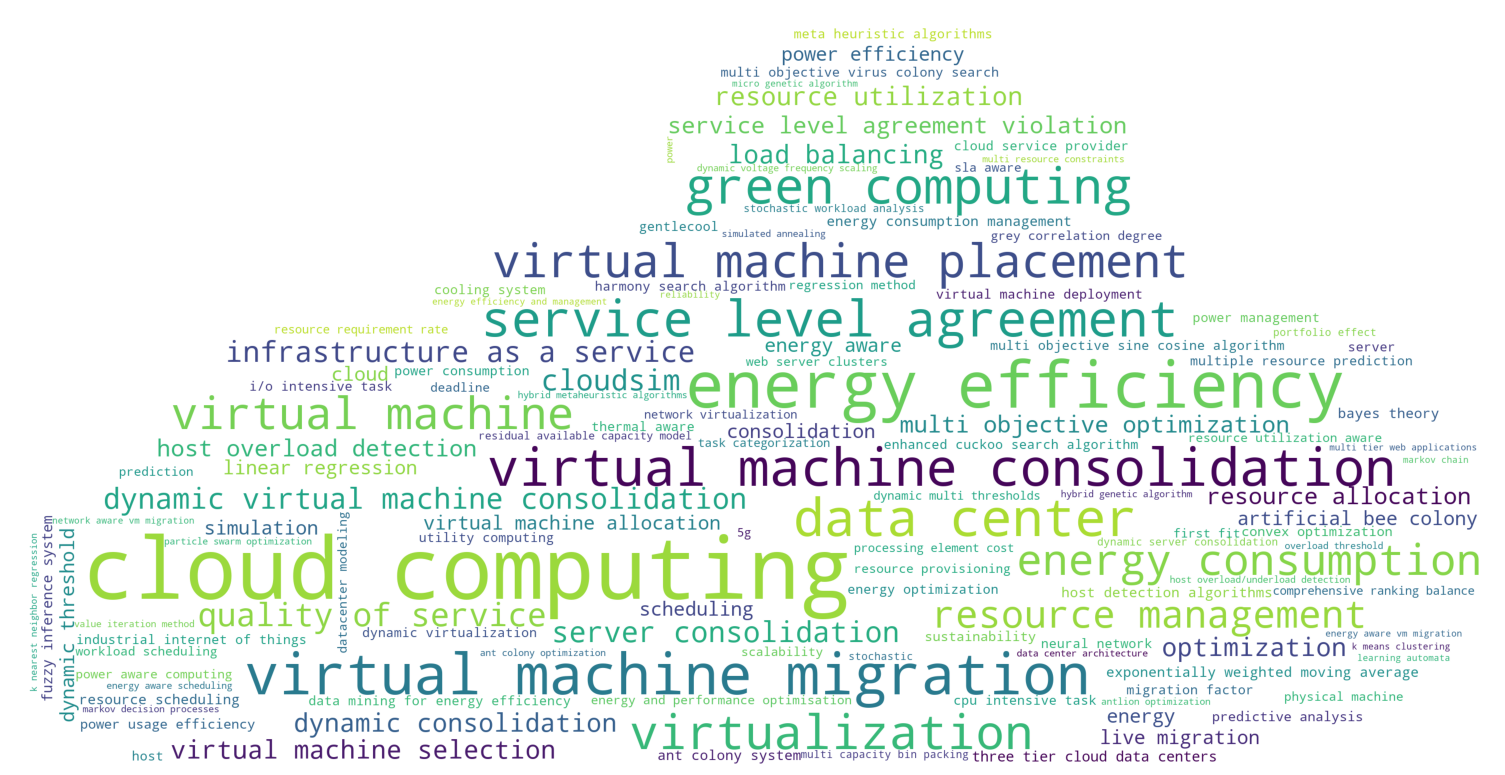

In [8]:
create_wordcloud(processed_frequencies, 'DEF-WordcloudProcessed.png')